<a href="https://colab.research.google.com/github/kokojoza/Data_Science_USD/blob/main/Data_Science_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
usd_rate = pd.read_excel('USD_RATE.xlsx')

In [4]:
brent_oil = pd.read_excel('BRENT_OIL.xls')

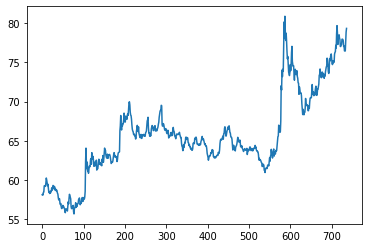

In [5]:
usd_rate.curs.plot()

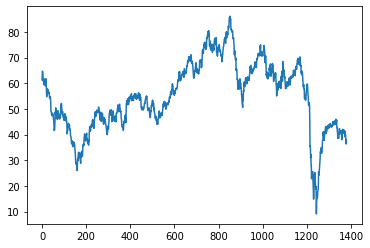

In [7]:
brent_oil.price.plot()

In [9]:
# Соединяем два датасета
df = usd_rate.set_index('data').join(brent_oil.set_index('date'))

In [27]:
# Заполняем пропуски, "пустые" ячейки методом ffill
df.fillna(method="ffill", inplace=True)
df.head()

,index,data,curs,price
0,0,2017-11-01,58.1179,60.98
1,1,2017-11-02,58.1557,60.79
2,2,2017-11-03,58.0869,61.42
3,3,2017-11-04,58.4296,61.42
4,4,2017-11-08,58.4557,63.96


In [29]:
# Удаляем лишние колонки
df.drop(["index"], axis=1, inplace=True)
df.head()

,data,curs,price
0,2017-11-01,58.1179,60.98
1,2017-11-02,58.1557,60.79
2,2017-11-03,58.0869,61.42
3,2017-11-04,58.4296,61.42
4,2017-11-08,58.4557,63.96


In [30]:
df.reset_index()
df.head()

,data,curs,price
0,2017-11-01,58.1179,60.98
1,2017-11-02,58.1557,60.79
2,2017-11-03,58.0869,61.42
3,2017-11-04,58.4296,61.42
4,2017-11-08,58.4557,63.96


In [32]:
# Преобразуем "дату" в виде строки, к DateTime
df['data'] = pd.to_datetime(df['data'], infer_datetime_format = True)

In [33]:
# Создаем новые колонки
df['year'] = df['data'].dt.year
df['month'] = df['data'].dt.month
df['weekday'] = df['data'].dt.weekday

In [34]:
df.head()

,data,curs,price,year,month,weekday
0,2017-11-01,58.1179,60.98,2017,11,2
1,2017-11-02,58.1557,60.79,2017,11,3
2,2017-11-03,58.0869,61.42,2017,11,4
3,2017-11-04,58.4296,61.42,2017,11,5
4,2017-11-08,58.4557,63.96,2017,11,2


In [35]:
past_days =7

In [36]:
for day in range(past_days):
  n = day+1
  df[f"day_lag_{n}"] = df['curs'].shift(n)
  df[f"oil_lag_{n}"] = df['price'].shift(n)
  df[f"mult_{n}"] = df[f"day_lag_{n}"] * df[f"oil_lag_{n}"]

In [38]:
df['usd_mean_week'] = df['curs'].shift(1).rolling(window=7).mean()
df['oil_mean_week'] = df['price'].shift(1).rolling(window=7).mean()

In [39]:
df = pd.get_dummies(df, columns=['year', 'month', 'weekday'])
df.tail()

,data,curs,price,day_lag_1,oil_lag_1,mult_1,day_lag_2,oil_lag_2,mult_2,day_lag_3,oil_lag_3,mult_3,day_lag_4,oil_lag_4,mult_4,day_lag_5,oil_lag_5,mult_5,day_lag_6,oil_lag_6,mult_6,day_lag_7,oil_lag_7,mult_7,usd_mean_week,oil_mean_week,year_2017,year_2018,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
732,2020-10-27,76.4443,39.72,76.4667,40.71,3112.959357,77.0809,40.71,3137.963439,77.0322,41.28,3179.889216,77.7780,40.09,3118.120020,77.9241,41.62,3243.201042,77.9644,41.34,3223.048296,77.9461,41.34,3222.291774,77.456057,41.012857,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
733,2020-10-28,76.4556,37.86,76.4443,39.72,3036.367596,76.4667,40.71,3112.959357,77.0809,40.71,3137.963439,77.0322,41.28,3179.889216,77.7780,40.09,3118.120020,77.9241,41.62,3243.201042,77.9644,41.34,3223.048296,77.241514,40.781429,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
734,2020-10-29,77.5520,36.56,76.4556,37.86,2894.609016,76.4443,39.72,3036.367596,76.4667,40.71,3112.959357,77.0809,40.71,3137.963439,77.0322,41.28,3179.889216,77.7780,40.09,3118.120020,77.9241,41.62,3243.201042,77.025971,40.284286,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
735,2020-10-30,78.8699,36.33,77.5520,36.56,2835.301120,76.4556,37.86,2894.609016,76.4443,39.72,3036.367596,76.4667,40.71,3112.959357,77.0809,40.71,3137.963439,77.0322,41.28,3179.889216,77.7780,40.09,3118.120020,76.972814,39.561429,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
736,2020-10-31,79.3323,36.33,78.8699,36.33,2865.343467,77.5520,36.56,2835.301120,76.4556,37.86,2894.609016,76.4443,39.72,3036.367596,76.4667,40.71,3112.959357,77.0809,40.71,3137.963439,77.0322,41.28,3179.889216,77.128800,39.024286,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [40]:
df_ready = df[7:].drop('data', axis=1)

In [41]:
# Обучающая выборка, = "учебник"
X_train = df_ready.drop('curs', axis=1)[:-20]
y_train = df_ready.curs[:-20]

In [42]:
# Тестовая выборка, = "экзамен"
X_test = df_ready.drop('curs', axis=1)[-20:]
y_test = df_ready.curs[-20:]

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
linreg = LinearRegression(normalize=True)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [45]:
prediction = linreg.predict(X_test)
prediction

array([77.9671936 , 77.76696777, 77.89453125, 77.88879395, 77.46139526,
       76.9046936 , 76.68884277, 77.12890625, 77.06066895, 77.71139526,
       77.8578186 , 77.79821777, 77.56640625, 77.09191895, 76.69577026,
       76.5296936 , 76.37634277, 76.56640625, 77.60754395, 78.71139526])

In [46]:
pd.DataFrame(data=linreg.coef_, index=X_train.columns).sort_values(0, axis=0)

,0
usd_mean_week,-1.726088e+12
oil_mean_week,-1.062048e+11
month_1,-4.585849e+10
month_2,-4.585849e+10
month_11,-4.585849e+10
month_6,-4.585849e+10
month_12,-4.585849e+10
month_10,-4.585849e+10
month_7,-4.585849e+10
month_3,-4.585849e+10


In [47]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, prediction)

0.3729450927734369

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rfr = RandomForestRegressor(random_state=42, n_estimators=100, criterion="mae")
rfr.fit(X_train, y_train)
prediction = rfr.predict(X_test)
mean_absolute_error(y_test, prediction)

0.4823826499999996

In [51]:
from sklearn.linear_model import LassoLarsCV

In [52]:
llcv = LassoLarsCV(normalize=True)
llcv.fit(X_train, y_train)
prediction = llcv.predict(X_test)
mean_absolute_error(y_test, prediction)

0.38106749323596817

In [53]:
pd.DataFrame(data=llcv.coef_, index=X_train.columns).sort_values(0, axis=0)

,0
weekday_6,-0.172815
month_1,-0.166805
year_2017,-0.158101
month_2,-0.053847
month_6,-0.049232
year_2019,-0.039262
price,-0.029196
weekday_5,-0.024107
day_lag_3,0.000000
weekday_4,0.000000


In [54]:
from sklearn.neighbors import KNeighborsRegressor

In [55]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
mean_absolute_error(y_test, prediction)

3.4797699999999985

In [56]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=42, hidden_layer_sizes=(200,200,200), max_iter=1000)
mlp.fit(X_train, y_train)
prediction = mlp.predict(X_test)
mean_absolute_error(y_test, prediction)

1.4709262235632905